In [88]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [89]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [90]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [91]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 220, 220, 128)     36992     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 110, 110, 128)     0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 110, 110, 128)     0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 108, 108, 64)      73792     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 54, 54, 64)       

In [92]:
train_datagen = image.ImageDataGenerator(rescale = 1./255, shear_range = 0.2,zoom_range = 0.2, horizontal_flip = True)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [93]:

#Reshaping test and validation images 
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [94]:

#Training the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=7,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

Epoch 1/10
7/7 [==============================] - 94s 13s/step - loss: 1.0392 - accuracy: 0.5134 - val_loss: 0.6817 - val_accuracy: 0.7333
Epoch 2/10
7/7 [==============================] - 93s 13s/step - loss: 0.6860 - accuracy: 0.5446 - val_loss: 0.6511 - val_accuracy: 0.7667
Epoch 3/10
7/7 [==============================] - 93s 13s/step - loss: 0.5307 - accuracy: 0.7768 - val_loss: 0.4215 - val_accuracy: 0.9167
Epoch 4/10
7/7 [==============================] - 99s 14s/step - loss: 0.3789 - accuracy: 0.8304 - val_loss: 0.2876 - val_accuracy: 0.9500
Epoch 5/10
7/7 [==============================] - 98s 14s/step - loss: 0.2585 - accuracy: 0.8929 - val_loss: 0.1436 - val_accuracy: 0.9667
Epoch 6/10
7/7 [==============================] - 99s 14s/step - loss: 0.2204 - accuracy: 0.9196 - val_loss: 0.1817 - val_accuracy: 0.9000
Epoch 7/10
7/7 [==============================] - 99s 14s/step - loss: 0.2264 - accuracy: 0.9286 - val_loss: 0.0819 - val_accuracy: 0.9833
Epoch 8/10
7/7 [===========

In [95]:
model.save("model_covid.h5")

In [96]:
model.evaluate(train_generator)

7/7 [==============================] - 26s 4s/step - loss: 0.1643 - accuracy: 0.9509


[0.1642562597990036, 0.9508928656578064]

In [97]:
! pip install matplotlib

from matplotlib import pyplot as plt

%matplotlib inline

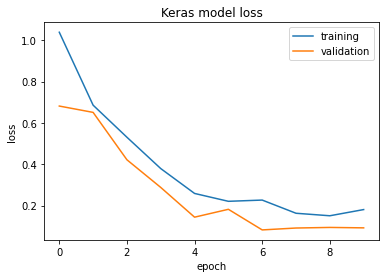

In [98]:
plt.title('Keras model loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()


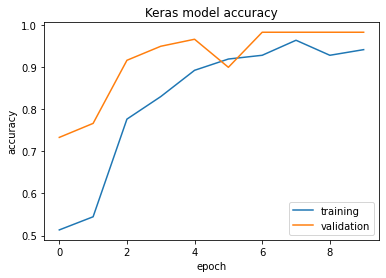

In [101]:
plt.title('Keras model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

In [102]:
import os
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [103]:
y_actual, y_test = [],[]

In [104]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
    img=image.load_img("./CovidDataset/Val/Normal/"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    pred=model.predict_classes(img)
    y_test.append(pred[0,0])
    y_actual.append(1)

In [105]:

for i in os.listdir("./CovidDataset/Val/Covid/"):
    img=image.load_img("./CovidDataset/Val/Covid/"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    pred=model.predict_classes(img)
    y_test.append(pred[0,0])
    y_actual.append(0)

In [106]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [107]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cn=confusion_matrix(y_actual,y_test)

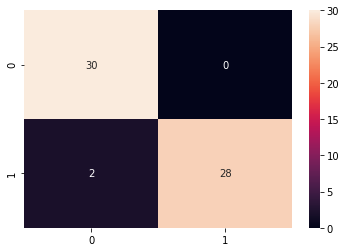

In [110]:
sns.heatmap(cn,cmap=None,annot=True) 